In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("Diabetes Health Data/diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.shape

(253680, 22)

In [8]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

### I. Handling Missing Data
Problem: Incomplete observations skew results.

Solutions:

* Deletion: Remove rows/columns with missing values.
* Use when: Missing data is random and <5% of dataset.
* Imputation: Fill missing values.
* Numerical: Mean/median
* Categorical: Mode (most frequent value)

In [9]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

no null columns so no need for performing null value removal 

### II. Categorical Data Encoding
Problem: ML algorithms require numerical input.

Solutions:

* Label Encoding: Assign integers to categories.

    * Example: "Red"→0, "Blue"→1

Use for: Ordinal data (e.g., "Low" < "Medium" < "High").

* One-Hot Encoding:Create binary columns per category.

    * Example: "Color_Red"=[1,0], "Color_Blue"=[0,1]

Use for: Nominal data (no order).
         encoding features, not the target

In [10]:
categorical_columns = df.select_dtypes( include=['object','category']).columns.to_list()
print("categorical data :",categorical_columns)

categorical data : []


only have continuous values so no need to data encoding

Feature scaling (like StandardScaler, MinMaxScaler, etc.) is sensitive to outliers — meaning outliers can drastically skew the result of scaling. Here’s why it's better to detect and handle outliers before scaling

### III. Outlier Detection
Problem: Extreme values distort statistics. Solutions:

#### 1.IQR Method:

* Q1: 25th percentile → "Middle" of the first half.

* Q2: 50th percentile → Median of the full dataset.

* Q3: 75th percentile → "Middle" of the second half.
            $$
            IQR = Q3 - Q1
            $$
            $$
            Lower Bound = Q1 - 1.5 * IQR
            $$
            $$
            Upper Bound = Q3 + 1.5 * IQR 
            $$
        
IQR = Q3 - Q1: Used for outlier detection (e.g., in boxplots). image.png


#### 2.Z-score: 
* Flag values where 
    $$
    z= x−μ / σ
    $$
    * Then, flag outliers where: $$  |z| > 3 $$


IQR will be used for outlier detection since it don't assume any distribution bu z score works best on normal distribution (bell-shaped curve)

In [11]:
import pandas as pd


numerical_cols = ['BMI', 'PhysHlth', 'MentHlth']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


BMI: 9847 outliers
PhysHlth: 40949 outliers
MentHlth: 36208 outliers


#### **Iv. Feature Scaling**

**Problem:**

Features on different scales bias models (e.g., age vs. salary).

**Solutions:**

Min-Max Scaling: Rescale to [0, 1].

$$
x' = \frac{x-min(x)}{\text{max}(x)-min(x)}
$$


Standardization (Z-score): Center around mean (μ=0, σ=1).
$$
x' = \frac{x - \mu}{\sigma}
$$

RobustScaler works by scaling your data using the median and the interquartile range (IQR) instead of the mean and standard deviation.


For each value in a column:
$$
X_{scaled} =\frac {X - Midian(X)}{IQR(x)}
$$


 
Where:

Median is the 50th percentile (middle value).

IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1):
$$ 
IQR = Q3 - Q1 
$$


There is no fixed output range, unlike MinMaxScaler . The output values depend on the distribution of the data after centering and scaling by the IQR.

However:

* If data follows a normal distribution without outliers, the scaled values usually fall roughly within [-1.5, 1.5]

* Outliers are not squashed (unlike in MinMaxScaler), so they may fall far outside this range


since min max and z score are sensitive for outliers so i used robust scaling 

In [12]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[['BMI', 'MentHlth', 'PhysHlth']])
scaled_df =  pd.DataFrame(scaled_data, columns=['BMI', 'MentHlth', 'PhysHlth'])
scaled_df.head()

,BMI,MentHlth,PhysHlth
0,1.857143,9.0,5.0
1,-0.285714,0.0,0.0
2,0.142857,15.0,10.0
3,0.000000,0.0,0.0
4,-0.428571,1.5,0.0


In [13]:
df2 = df.drop(['BMI', 'MentHlth', 'PhysHlth'], axis=1)
df_robust = pd.concat([df2, scaled_df], axis=1)
df_robust.head()
df=df_robust


since min max scaler are sensitive to outliers using min max after outlier removal  and the distribution is not normal thats why we don't use z-score 

# **V. Train-Test Split**

**Problem:**
 Avoid overfitting by evaluating on unseen data.

**Solution:**

- Split data into training (70-80%) and testing (20-30%) sets.

- Stratified split preserves class ratios.

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_012', axis=1)  
y = df['Diabetes_012']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         
    stratify=y, # preserve class distribution           
    random_state=42 # seed            
)

print("Class distribution in full data:\n", y.value_counts(normalize=True))
print("\nClass distribution in training data:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in test data:\n", y_test.value_counts(normalize=True))


Class distribution in full data:
 Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Class distribution in training data:
 Diabetes_012
0.0    0.842410
2.0    0.139334
1.0    0.018256
Name: proportion, dtype: float64

Class distribution in test data:
 Diabetes_012
0.0    0.842420
2.0    0.139329
1.0    0.018251
Name: proportion, dtype: float64


# **VI. Dimensionality Reduction (PCA)**
**Problem:**

High dimensions increase complexity.

**Solution:**
Project data onto principal components (eigenvectors of covariance matrix).

* And PCA is a process of figuring out the most important dimensions or the principal components.
* It can extract the most informative features while still preserving large data sets with the most relevant information from the initial data set.
* what PCA is doing is summarizing the information content of large data sets into a smaller set of uncorrelated variables, known as principal components.These principal components are linear combinations of the original variables that have the maximum variance compared to other linear combinations.Essentially, these components capture as much information from the original dataset as possible.
### **Principal Component Analysis (PCA) - Formulas**

#### **Step 1: Mean Centering the Data**

Let $X$ be your data matrix with $n$ samples and $p$ features. First, subtract the mean from each feature (mean centering):

$$
X_{\text{centered}} = X - \bar{X}
$$



#### **Step 2: Compute the Covariance Matrix**

$$
\Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

* $\Sigma$: Covariance matrix
* $X_{\text{centered}}$: Mean-centered data



#### **Step 3: Eigen Decomposition**
What directions 𝑣 in the feature space make the data stretch the most, without changing direction

Solve the eigenvalue problem:

$$
\Sigma v = \lambda v
$$

* $v$: Eigenvectors (principal components)
* $\lambda$: Eigenvalues (explained variance by each component)



#### **Step 4: Select Top $k$ Components**

Choose the top $k$ eigenvectors with the highest eigenvalues and form a matrix $W$:

$$
W = [v_1, v_2, \dots, v_k]
$$



#### **Step 5: Project the Data onto the New Feature Space**

$$
Z = X_{\text{centered}} \cdot W
$$

* $Z$: The transformed data in the principal component space



### **Final Formula**

$$
Z = (X - \bar{X}) \cdot W
$$




(202944, 21)
Number of components explaining 95% variance: 5
              PC1       PC2       PC3       PC4       PC5
0       -1.750143  2.010878 -0.891507 -2.310510 -0.576083
1       -1.763075 -6.426391  2.634861 -2.266865  0.140029
2       -1.563900  3.086766 -1.163317 -2.971464  0.097285
3       -1.108451 -4.161103  3.033207 -0.882390 -0.088806
4       -0.257950  0.871009 -1.038341 -2.514821  0.178222
...           ...       ...       ...       ...       ...
202939  -1.763242 -2.330713  0.181044  0.145295  1.062841
202940  14.202889 -4.515559 -0.653069  1.797623  0.392877
202941   7.779381 -5.070413  2.075755 -2.732972  0.098224
202942  -2.123334 -2.594322 -0.164081  1.186608 -1.011876
202943  -0.815280 -0.151889 -0.195731 -0.316289  0.267695

[202944 rows x 5 columns]
Original X_train shape: (202944, 21)
PCA-transformed X_train shape: (202944, 5)
Original X_test shape: (50736, 21)
PCA-transformed X_test shape: (50736, 5)


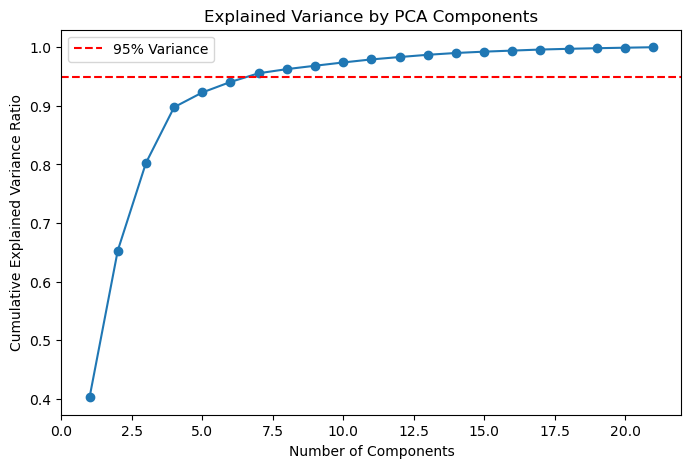

In [26]:
print (X_train.shape)
X_train = X_train
X_test = X_test


# It calculates all possible super-scores it can, and it knows how much unique information each super-score captures
pca = PCA()
pca.fit(X_train)

#represents the proportion of total variance explained by the corresponding single principal component.
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(explained_variance_ratio >= 0.90) + 1  # Choose components explaining 95% variance
print(f"Number of components explaining 95% variance: {n_components}")


pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print(X_train_pca_df)

print(f"Original X_train shape: {X_train.shape}")
print(f"PCA-transformed X_train shape: {X_train_pca_df.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"PCA-transformed X_test shape: {X_test_pca_df.shape}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.legend()
plt.show()

#### Good signs from the  PCA  variance plot:
Sharp curve and fast saturation:
* capture 95% of the variance in just 6 components out of 22. That’s excellent — it means:

    * The dataset has some redundancy (correlated features),

    * PCA can compress the data without much information loss.

Clear elbow around component 4–6:
* There’s a visible "elbow" shape, meaning the first few components explain the bulk of the variance. This is exactly what i wanted to see.

the graph does clearly show that i can use just 5–6 principal components instead of all 22.
* Instead of 22 features, i could use just 5–6 principal components for speed or to reduce overfitting